In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


# Percentage Coverage and recipe count with string matching

In [2]:
#read the csv file
input_file = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Github-SustainableFoodDB/Data/RecipeCF/RecipeDB_CF_with_string_matching.csv', encoding='latin1')

In [3]:
input_file

,Recipe ID,Recipe Ingredient,Total Ingredient,Available Ingredients,Available Count,Not Available Ingredients,Not Available Count,Available Percentage,Recipe_CF
0,709824,"['black pepper', 'cumin', 'garlic', 'sea salt'...",10,"['cumin', 'garlic', 'carrot', 'coriander', 're...",8,"['black pepper', 'sea salt']",2,80.000000,5.56
1,905901,"['green bean carrot', 'vegetable oil', 'bay le...",9,"['green bean carrot', 'vegetable oil', 'garlic...",6,"['bay leaf', 'cardamom', 'salt black pepper']",3,66.666667,6.86
2,725971,"['okra', 'salt black pepper', 'lamb shoulder',...",7,"['okra', 'lamb shoulder', 'tomato sauce', 'wat...",6,['salt black pepper'],1,85.714286,32.06
3,114702,"['cornmeal', 'cumin', 'sauce', 'garlic', 'cori...",10,"['cornmeal', 'cumin', 'garlic', 'coriander', '...",8,"['sauce', 'salt']",2,80.000000,15.59
4,440574,"['black pepper', 'sea salt', 'cumin seed', 'co...",6,"['coriander seed', 'sesame seed', 'hazelnut']",3,"['black pepper', 'sea salt', 'cumin seed']",3,50.000000,2.27
...,...,...,...,...,...,...,...,...,...
118078,523830,"['yellow pepper', 'mushroom', 'garlic', 'jalap...",10,"['mushroom', 'garlic', 'celery', 'red pepper',...",5,"['yellow pepper', 'jalapeno pepper', 'vegetabl...",5,50.000000,4.15
118079,660518,"['cardamom seed', 'asian pear', 'water', 'ging...",4,"['asian pear', 'water', 'ginger']",3,['cardamom seed'],1,75.000000,1.66
118080,742230,"['potato', 'pepper', 'vegetable stock', 'salt'...",6,"['potato', 'pepper', 'vegetable stock', 'onion...",5,['salt'],1,83.333333,5.60
118081,779223,"['baking powder', 'vanilla', 'flour', 'sugar',...",7,"['vanilla', 'flour', 'sugar', 'margarine', 'li...",5,"['baking powder', 'salt']",2,71.428571,8.48


In [4]:
ava_percnt = input_file.groupby('Available Percentage')
recipe_count = ava_percnt.size().reset_index(name='Recipe Count')

percentage_count_df = pd.DataFrame({'Available Percentage': recipe_count['Available Percentage'], 'Recipe Count': recipe_count['Recipe Count']})

percentage_count_df


,Available Percentage,Recipe Count
0,0.000000,346
1,8.333333,4
2,9.090909,1
3,10.000000,5
4,11.111111,9
...,...,...
194,94.117647,11
195,94.444444,8
196,94.736842,4
197,95.000000,1


In [5]:
print(sum(percentage_count_df['Recipe Count']))

118083


In [6]:
import numpy as np

# Divide the 'Available percentage' column into multiple bins of 20
bins = np.arange(0, 101, 20)
percentage_count_df['Percentage Bin'] = pd.cut(percentage_count_df['Available Percentage'], bins)

# Group the DataFrame by the 'Percentage Bin' column and sum the recipe count
bin_count_df = percentage_count_df.groupby('Percentage Bin')['Recipe Count'].sum().reset_index(name='Recipe Count')

bin_count_df

,Percentage Bin,Recipe Count
0,"(0, 20]",608
1,"(20, 40]",7055
2,"(40, 60]",33246
3,"(60, 80]",54702
4,"(80, 100]",22126


divide into bins of 10

In [7]:
import numpy as np

# Divide the 'Available percentage' column into multiple bins of 10
bins = np.arange(0, 101, 10)
percentage_count_df['Percentage Bin'] = pd.cut(percentage_count_df['Available Percentage'], bins)

# Group the DataFrame by the 'Percentage Bin' column and sum the recipe count
bin_count_df_10 = percentage_count_df.groupby('Percentage Bin')['Recipe Count'].sum().reset_index(name='Recipe Count')

bin_count_df_10

,Percentage Bin,Recipe Count
0,"(0, 10]",10
1,"(10, 20]",598
2,"(20, 30]",1543
3,"(30, 40]",5512
4,"(40, 50]",14721
5,"(50, 60]",18525
6,"(60, 70]",26719
7,"(70, 80]",27983
8,"(80, 90]",14756
9,"(90, 100]",7370


# Percentage Coverage and recipe count without string matching

In [8]:
#read the csv file
input_file1 = pd.read_csv('D:/IIITD/Mansi_Thesis_Research/Foodprint/Github-SustainableFoodDB/Data/RecipeCF/RecipeDB_CF_without_string_matching.csv', encoding='latin1')

In [9]:
ava_percnt1 = input_file1.groupby('Available Percentage')

recipe_count1 = ava_percnt1.size().reset_index(name='Recipe Count')

# Create a DataFrame with percentage and recipe count columns
percentage_count_df1 = pd.DataFrame({'Available Percentage': recipe_count1['Available Percentage'], 'Recipe Count': recipe_count1['Recipe Count']})

percentage_count_df1


,Available Percentage,Recipe Count
0,0.000000,8697
1,3.703704,1
2,3.846154,1
3,4.000000,1
4,4.166667,1
...,...,...
172,87.500000,11
173,88.888889,1
174,90.000000,2
175,90.909091,1


In [10]:
bins = np.arange(0, 101, 20)
percentage_count_df1['Percentage Bin'] = pd.cut(percentage_count_df1['Available Percentage'], bins)

# Group the DataFrame by the 'Percentage Bin' column and sum the recipe count
bin_count_df1 = percentage_count_df1.groupby('Percentage Bin')['Recipe Count'].sum().reset_index(name='Recipe Count')

bin_count_df1

,Percentage Bin,Recipe Count
0,"(0, 20]",32608
1,"(20, 40]",56466
2,"(40, 60]",17825
3,"(60, 80]",2268
4,"(80, 100]",219


In [11]:
bins = np.arange(0, 101, 10)
percentage_count_df1['Percentage Bin'] = pd.cut(percentage_count_df1['Available Percentage'], bins)

# Group the DataFrame by the 'Percentage Bin' column and sum the recipe count
bin_count_df1_10 = percentage_count_df1.groupby('Percentage Bin')['Recipe Count'].sum().reset_index(name='Recipe Count')

bin_count_df1_10

,Percentage Bin,Recipe Count
0,"(0, 10]",5143
1,"(10, 20]",27465
2,"(20, 30]",30009
3,"(30, 40]",26457
4,"(40, 50]",14274
5,"(50, 60]",3551
6,"(60, 70]",1521
7,"(70, 80]",747
8,"(80, 90]",96
9,"(90, 100]",123


# Plot graph with and without string matching for available percentage coverage

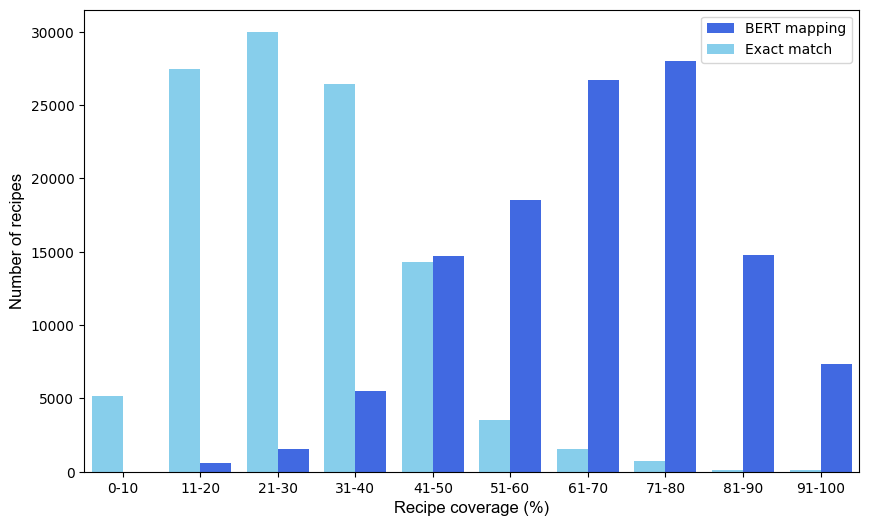

In [12]:
from scipy.interpolate import make_interp_spline

X = ['0-10', '11-20', '21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
X_axis = np.arange(len(X))

plt.figure(figsize=(10,6)) 

plt.bar(X_axis + 0.2, bin_count_df_10['Recipe Count'], 0.4, color='royalblue', label = 'BERT mapping')
plt.bar(X_axis - 0.2, bin_count_df1_10['Recipe Count'], 0.4, color='skyblue', label = 'Exact match')

plt.xticks(X_axis, X)
plt.xlabel("Recipe coverage (%)", fontsize=12, fontname="Arial")
plt.ylabel("Number of recipes", fontsize=12, fontname="Arial")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.margins(x=0.01,tight=True)
    
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=10)

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Github-SustainableFoodDB/Plots/Ingredient_Analysis/AvailablePercent_Recipebins.jpeg", dpi=300)
# plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Carbon_Footprint_July23/Plots/Ingredient_Analysis/AvailablePercent_RecipeCount_10.svg", dpi=300)
plt.show()


# Percentage coverage cuttoff VS No. of recipes

Without string matching cutoffs

[105923, 83770, 50101, 25260, 12003, 3562, 1026, 379, 125, 122]


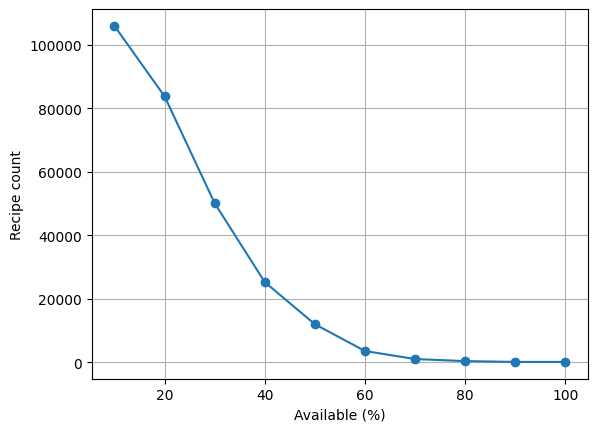

In [13]:
cutoff_values = list(range(10, 101, 10))
recipe_count_without = []

for cutoff in cutoff_values:
    remaining_recipes = input_file1[input_file1['Available Percentage'] >= cutoff]
    count = len(remaining_recipes)
    recipe_count_without.append(count)
print(recipe_count_without)

# Plotting cumulative recipe counts
plt.plot(cutoff_values, recipe_count_without, marker='o')
plt.xlabel('Available (%)')
plt.ylabel('Recipe count')
plt.grid(True)
plt.show()



With string matching cutoffs

[117732, 117448, 115767, 112047, 104552, 82626, 53403, 27626, 8429, 5906]


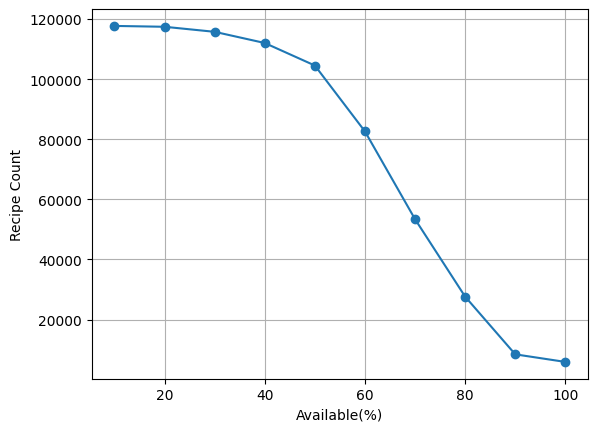

In [14]:
cutoff_values = list(range(10, 101, 10))
recipe_count_with = []


for cutoff in cutoff_values:
    remaining_recipes = input_file[input_file['Available Percentage'] >= cutoff]
    count = len(remaining_recipes)
    recipe_count_with.append(count)
print(recipe_count_with)

# Plotting cumulative recipe counts

plt.plot(cutoff_values, recipe_count_with, marker='o')
plt.xlabel('Available(%)')
plt.ylabel('Recipe Count')
plt.grid(True)
plt.show()



# Recipe Coverage Plot

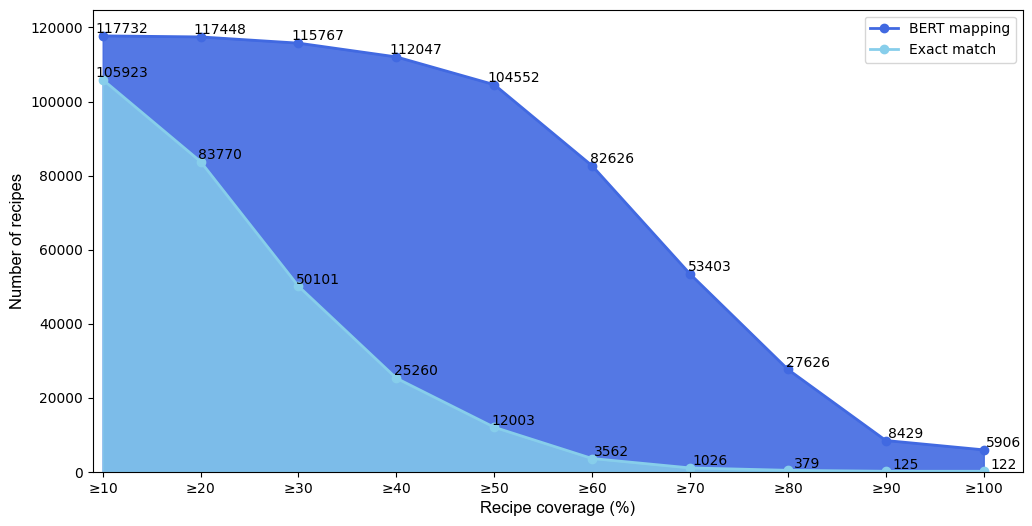

In [15]:
X = ['$\u2265$10', '$\u2265$20', '$\u2265$30', '$\u2265$40', '$\u2265$50', '$\u2265$60', 
     '$\u2265$70', '$\u2265$80', '$\u2265$90', '$\u2265$100']
X_axis = np.arange(len(X))

plt.figure(figsize=(12, 6))

# Plot the curves with filled areas

plt.plot(X_axis, recipe_count_with, color='royalblue', marker='o', label='BERT mapping', linewidth=2)
plt.fill_between(X_axis, recipe_count_with, color='royalblue', alpha=0.9)


plt.plot(X_axis, recipe_count_without, color='skyblue', marker='o', label='Exact match', linewidth=2)
plt.fill_between(X_axis, recipe_count_without, color='skyblue', alpha=0.8)

plt.xticks(X_axis, X)

plt.xlabel("Recipe coverage (%)", fontsize=12, fontname="Arial")
plt.ylabel("Number of recipes", fontsize=12, fontname="Arial")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=10)

for i in range(len(X_axis)):
    plt.text(X_axis[i] + 0.2, recipe_count_without[i] - 2, str(recipe_count_without[i]), fontsize=10, ha='center', va='bottom')  # exact match
    plt.text(X_axis[i] + 0.2, recipe_count_with[i] + 2, str(recipe_count_with[i]), fontsize=10, ha='center', va='bottom')  # substring match

plt.xlim(-0.1, len(X_axis) - 0.6)
plt.ylim(0, max(max(recipe_count_with), max(recipe_count_without)) * 1.06)

plt.savefig("D:/IIITD/Mansi_Thesis_Research/Foodprint/Github-SustainableFoodDB/Plots/Ingredient_Analysis/Coverage_cutoff_areafill.jpeg", bbox_inches= 'tight', dpi=300)

plt.show()
